<a href="https://colab.research.google.com/github/markodesu/home-prices-bishkek/blob/main/Home_Prices(Kadyrmamat%2C_Mariiam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O house_kg_10K_ads.csv https://drive.google.com/uc?id=1DM8H-MdYDxxtjztUR2nJ67ZlXwI17BO0

--2023-08-25 01:13:17--  https://drive.google.com/uc?id=1DM8H-MdYDxxtjztUR2nJ67ZlXwI17BO0
Resolving drive.google.com (drive.google.com)... 173.194.211.101, 173.194.211.138, 173.194.211.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4e0nbkpn0liui0uuqohlehdsh87k2ltb/1692925950000/16608975101254747244/*/1DM8H-MdYDxxtjztUR2nJ67ZlXwI17BO0?uuid=272c720c-7c28-4272-a5c9-7a1f5386d435 [following]
--2023-08-25 01:13:18--  https://doc-14-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4e0nbkpn0liui0uuqohlehdsh87k2ltb/1692925950000/16608975101254747244/*/1DM8H-MdYDxxtjztUR2nJ67ZlXwI17BO0?uuid=272c720c-7c28-4272-a5c9-7a1f5386d435
Resolving doc-14-0s-docs.googleusercontent.com (doc-14-0s-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connecting to do

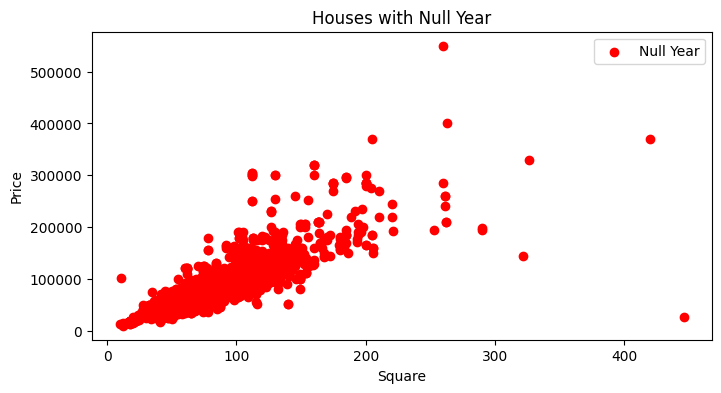

In [ ]:
import pandas as pd
df = pd.read_csv('house_kg_10K_ads.csv')

import matplotlib.pyplot as plt

# Filter the DataFrame for rows with null values in 'year'
null_year_houses = df[df['year'].isnull()]

# Create a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(null_year_houses['square'], null_year_houses['price'], color='red', label='Null Year')
plt.xlabel('Square')
plt.ylabel('Price')
plt.title('Houses with Null Year')
plt.legend()
plt.show()


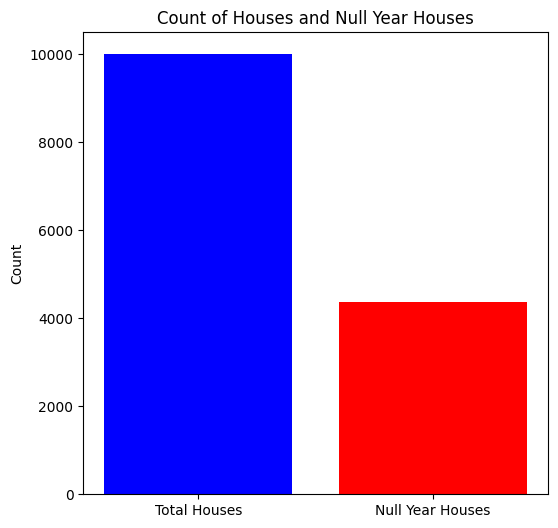

In [ ]:
total_count = len(df)
null_year_count = df['year'].isnull().sum()

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(['Total Houses', 'Null Year Houses'], [total_count, null_year_count], color=['blue', 'red'])
plt.ylabel('Count')
plt.title('Count of Houses and Null Year Houses')
plt.show()

<ipython-input-9-abdaf4812eed>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


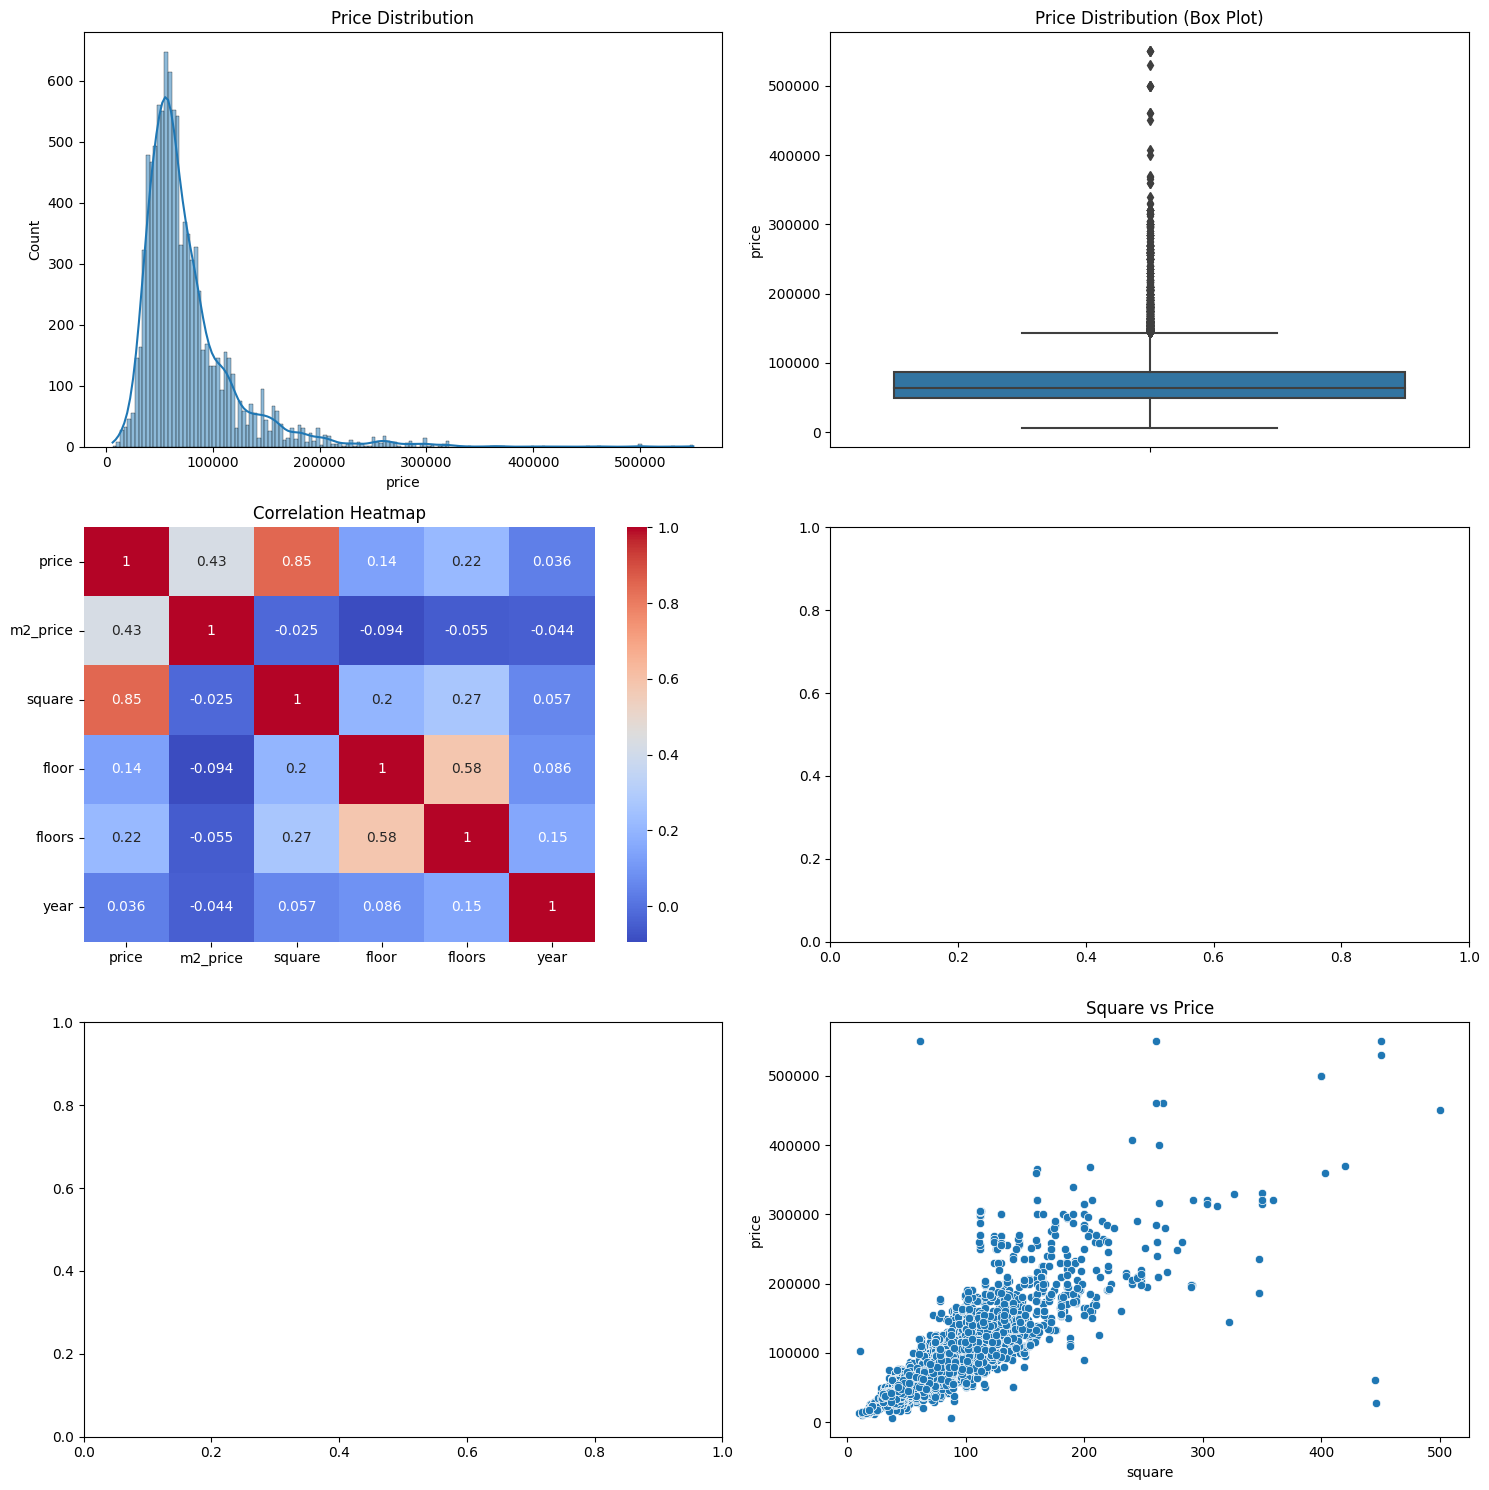

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

sns.histplot(data=df, x='price', ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Price Distribution')


corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')


sns.scatterplot(data=df, x='square', y='price', ax=axes[2, 1])
axes[2, 1].set_title('Square vs Price')

plt.tight_layout()
plt.show()


In [ ]:
df = df[~df.isnull().any(axis=1)]

In [ ]:
null_rows = df[df.isnull().any(axis=1)]
print(len(null_rows))
print(df.isnull().any(axis=0))

0
price             False
m2_price          False
square            False
rooms             False
district          False
micro_district    False
building_type     False
floor             False
floors            False
year              False
date              False
source            False
condition         False
dtype: bool


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           3697 non-null   int64  
 1   m2_price        3697 non-null   int64  
 2   square          3697 non-null   int64  
 3   rooms           3697 non-null   object 
 4   district        3697 non-null   object 
 5   micro_district  3697 non-null   object 
 6   building_type   3697 non-null   object 
 7   floor           3697 non-null   int64  
 8   floors          3697 non-null   int64  
 9   year            3697 non-null   float64
 10  date            3697 non-null   object 
 11  source          3697 non-null   object 
 12  condition       3697 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 404.4+ KB


<Axes: xlabel='year', ylabel='price'>

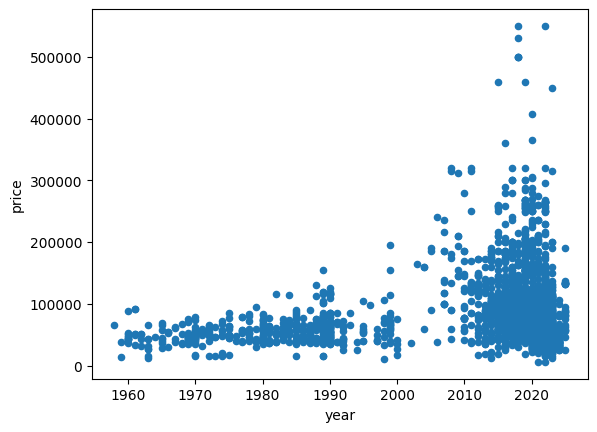

In [ ]:
df.plot.scatter('year', 'price')

<Axes: >

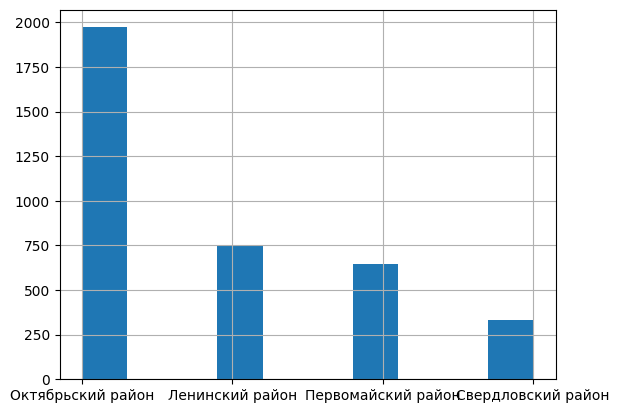

In [ ]:
df['district'].hist()

<Axes: >

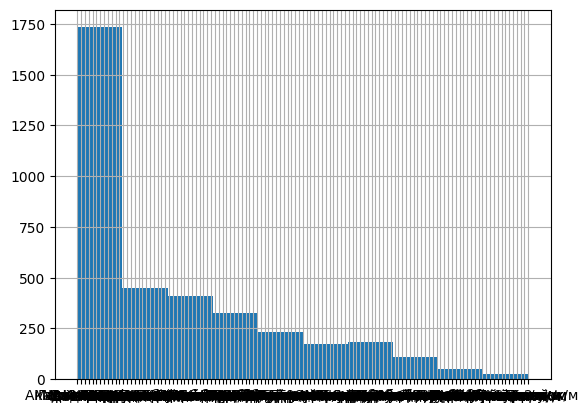

In [ ]:
df['micro_district'].hist()

In [ ]:
len(df['micro_district'].unique())

119

In [ ]:
df['building_type'].unique()

array(['кирпичный', 'монолитный', 'панельный'], dtype=object)

In [ ]:
df['floor'].unique()

array([12,  5,  1,  9,  7, 13,  3,  6,  4,  2,  8, 11, 14, 10, 15, -1, 16])

In [ ]:
df.sort_values("year").tail()

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,source,condition
6222,24750,550,45,1,Октябрьский район,Магистраль,монолитный,11,16,2025.0,2022-12-20 11:56:28,Site,не достроено
3106,82328,1090,76,2,Октябрьский район,Магистраль,монолитный,5,18,2025.0,2023-01-23 08:43:02,Site,под самоотделку (ПСО)
3104,190118,1090,174,4,Октябрьский район,Магистраль,монолитный,8,18,2025.0,2023-01-23 08:43:14,Site,под самоотделку (ПСО)
3100,86938,1090,80,2,Октябрьский район,Магистраль,монолитный,8,18,2025.0,2023-01-23 08:43:38,Site,под самоотделку (ПСО)
6197,57600,1200,48,1,Октябрьский район,Магистраль,монолитный,10,18,2025.0,2022-12-20 13:14:44,iOS,под самоотделку (ПСО)


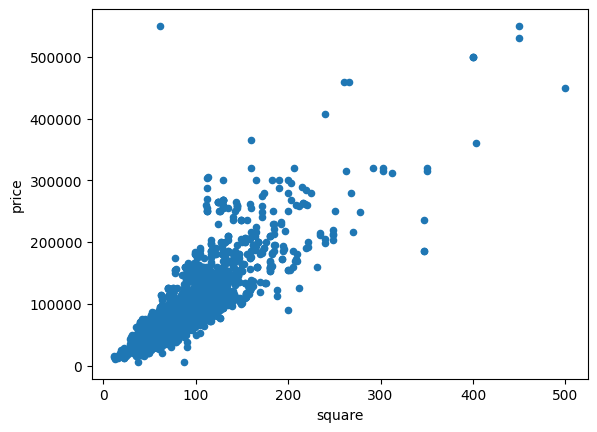

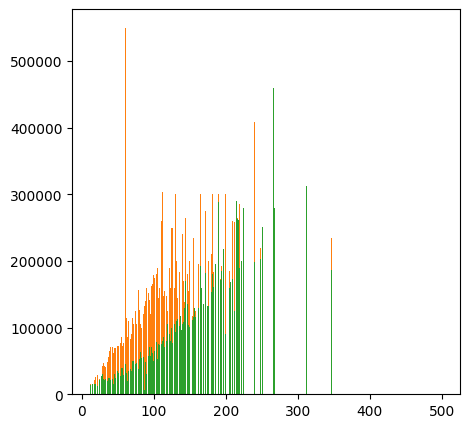

In [ ]:
import matplotlib.pyplot as plt

feature='square'
fig, ax = plt.subplots()
newdf=df[df[feature] > 0]
newdf[['price',feature]].plot.scatter(feature,'price',ax=ax)
plt.figure(figsize=(5,5))

grouped = df.groupby('square')['price'].agg(['mean', 'max', 'min'])
grouped = grouped.reset_index()
plt.bar(grouped['square'], grouped['mean'], label='Mean')
plt.bar(grouped['square'], grouped['max'], label='Max')
plt.bar(grouped['square'], grouped['min'], label='Min')
plt.show()

In [ ]:
condition_counts = df['condition'].value_counts()
print(condition_counts)


под самоотделку (ПСО)    1408
евроремонт               1332
хорошее                   671
среднее                   148
требует ремонта            71
не достроено               35
черновая отделка           24
свободная планировка        8
Name: condition, dtype: int64


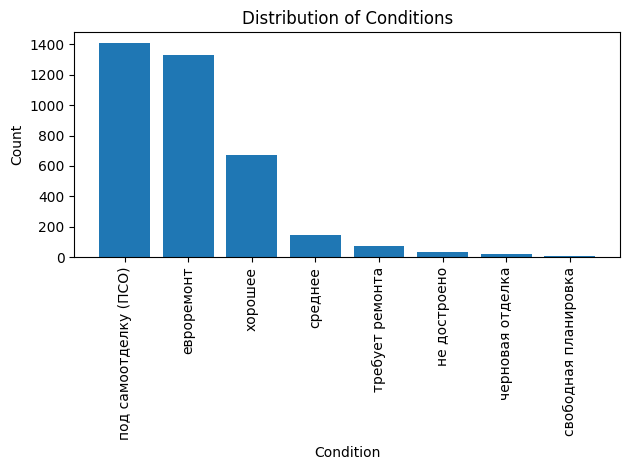

In [ ]:
import matplotlib.pyplot as plt

plt.bar(condition_counts.index, condition_counts.values)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Distribution of Conditions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
grouped = df.groupby('district')['micro_district'].value_counts()
print(grouped)


district            micro_district         
Ленинский район     Джал 15 м-н                82
                    Джал-29 м-н                68
                    Джальская больница         54
                    Ак Кеме                    50
                    Московская - Уметалиева    49
                                               ..
Свердловский район  Таатан                      2
                    Гоин                        1
                    Дордой ж/м                  1
                    Учкун ж/м                   1
                    Церковь                     1
Name: micro_district, Length: 119, dtype: int64


<ipython-input-25-524d264b091d>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


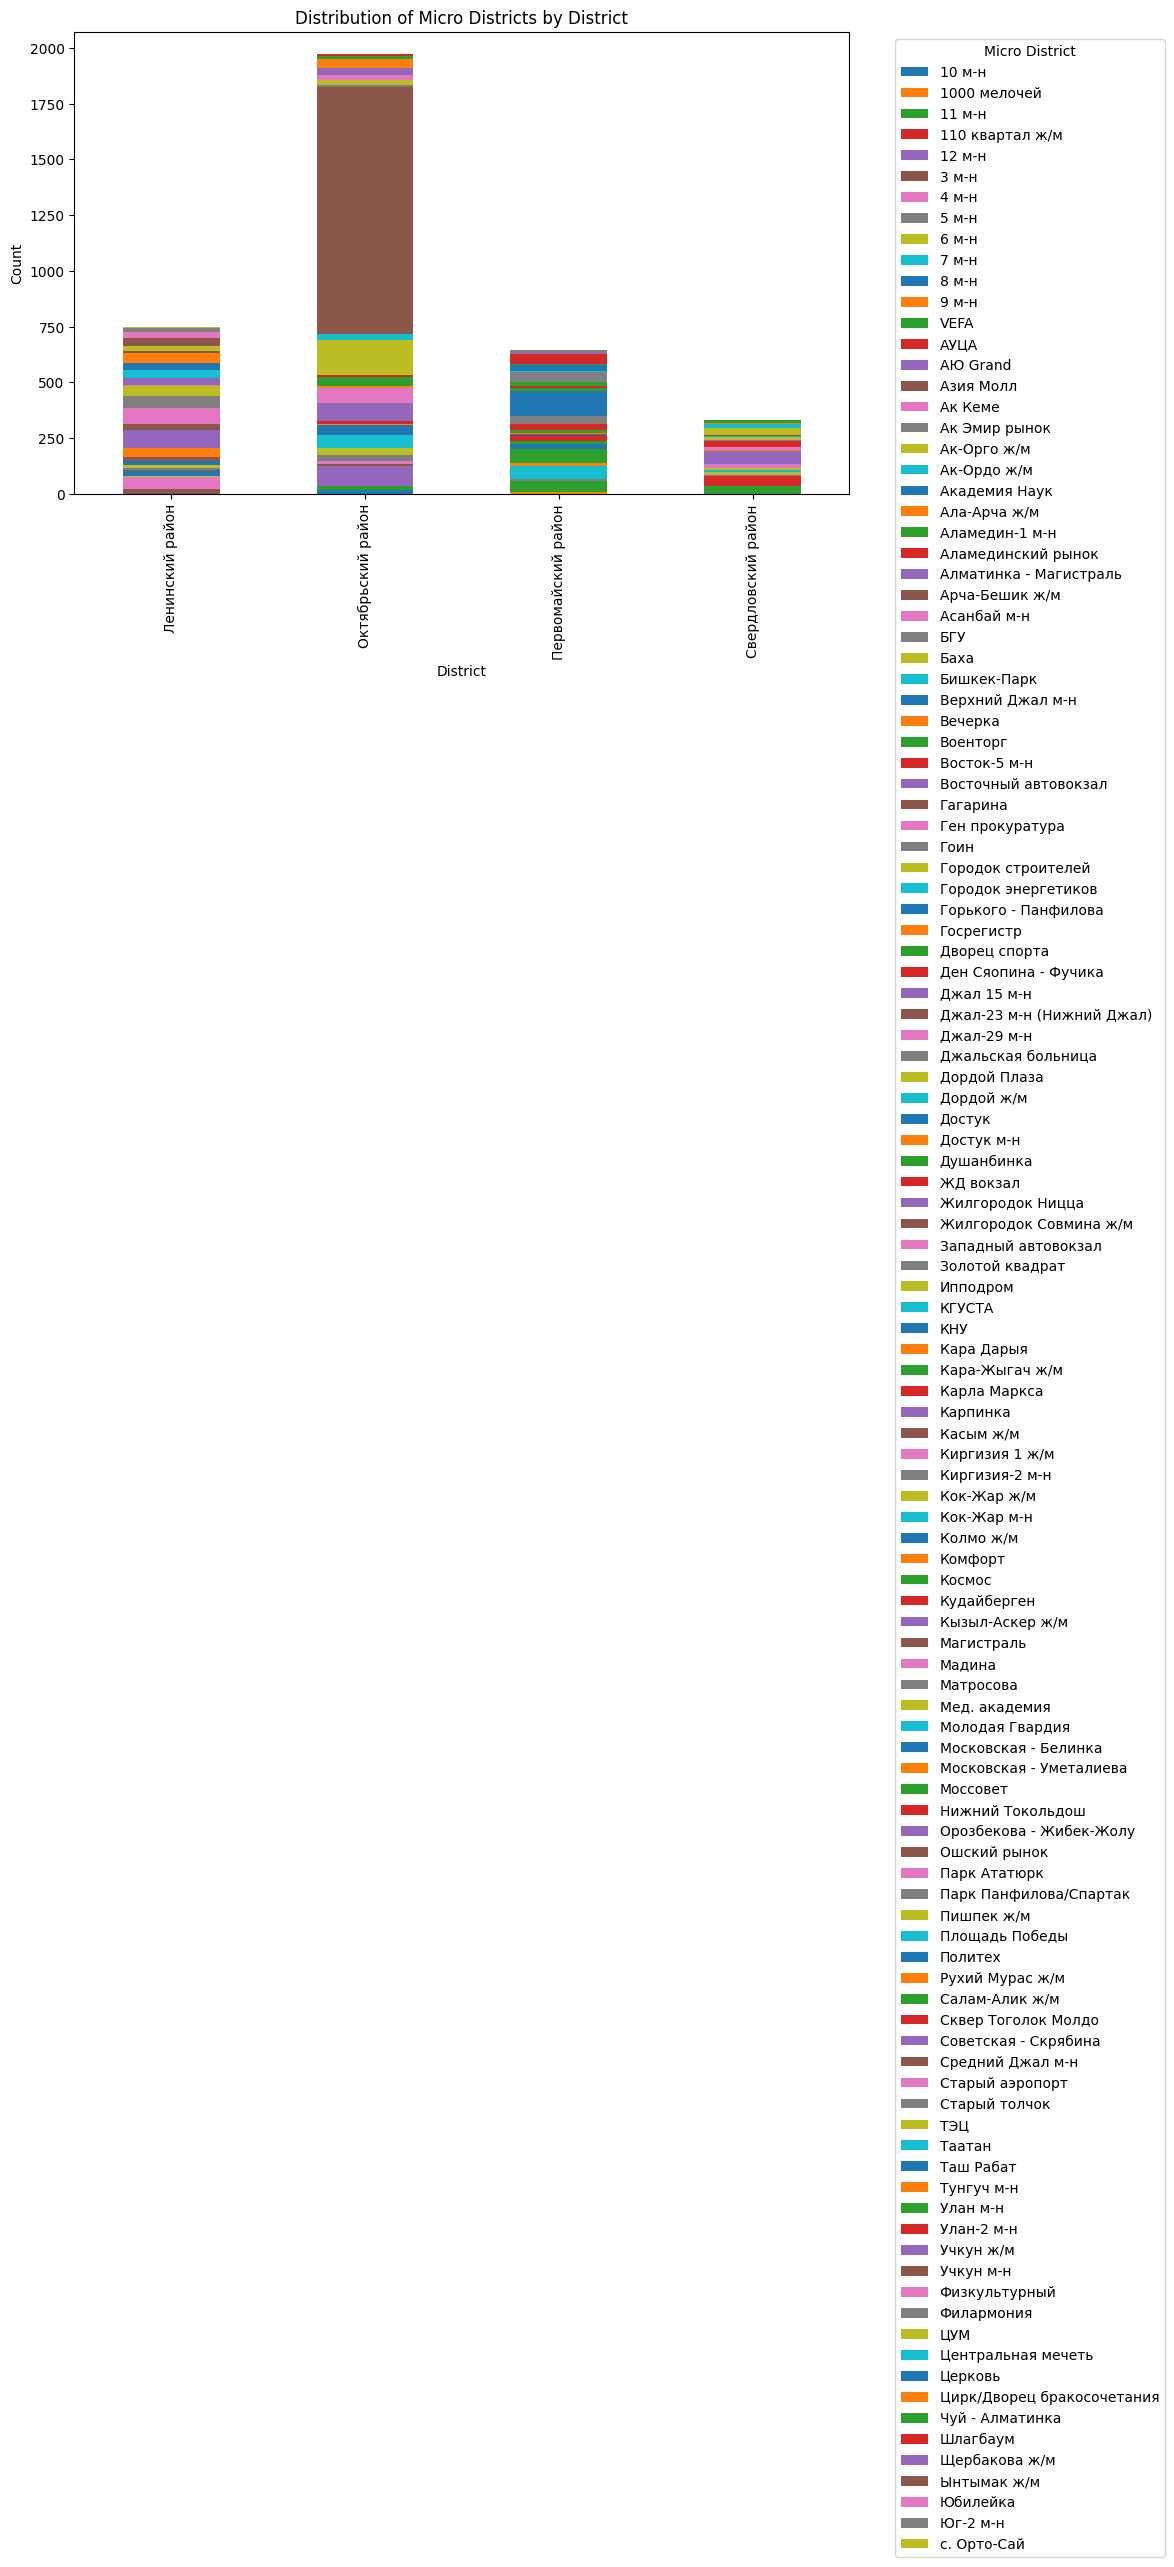

In [ ]:
grouped.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Distribution of Micro Districts by District')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Micro District')
plt.tight_layout()
plt.show()